In [1]:
#importing python classes and packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #use to visualize dataset vallues
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [29]:
#loading and displaying customer churn dataset
dataset = pd.read_csv("Dataset/Customer_Data.csv")
labels = np.unique(dataset['Customer_Status'])
dataset

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,43397-UTT,Female,41,No,Uttar Pradesh,6,33,NaN,Yes,Yes,...,Credit Card,74.40,896.75,0.00,0,37.96,934.71,Churned,Competitor,Competitor made better offer
6414,22240-HAR,Male,51,Yes,Haryana,0,19,Deal 1,No,NaN,...,Credit Card,45.25,3139.80,0.00,0,0.00,3139.80,Stayed,NaN,NaN
6415,78682-KER,Female,65,Yes,Kerala,14,25,NaN,Yes,Yes,...,Bank Withdrawal,74.95,2869.85,0.00,0,599.64,3469.49,Churned,Dissatisfaction,Product dissatisfaction
6416,17816-ODI,Male,23,No,Odisha,2,10,NaN,Yes,Yes,...,Credit Card,70.15,4480.70,0.00,0,2107.52,6588.22,Stayed,NaN,NaN


In [30]:
#describing dataset numeric values in terms of min, max, mean etc
dataset.describe(exclude="object")

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,47.070739,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,16.703633,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,18.000000,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,33.000000,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,46.000000,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,60.000000,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,85.000000,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [31]:
#describing categorical data
dataset.describe(include="object")

,Customer_ID,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,...,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Customer_Status,Churn_Category,Churn_Reason
count,6418,6418,6418,6418,2870,6418,5796,6418,5028,5028,...,5028,5028,5028,5028,6418,6418,6418,6418,1732,1732
unique,6418,2,2,22,5,2,2,2,3,2,...,2,2,2,2,3,2,3,3,5,20
top,19877-DEL,Female,No,Uttar Pradesh,Deal 2,Yes,No,Yes,Fiber Optic,No,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,Competitor,Competitor had better devices
freq,1,4048,3223,629,758,5796,3082,5028,2764,3204,...,2556,2520,2766,4334,3286,3792,3575,4275,761,289


In [32]:
#finding and displaying count of missing or null values
dataset.isnull().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3548
Phone_Service                     0
Multiple_Lines                  622
Internet_Service                  0
Internet_Type                  1390
Online_Security                1390
Online_Backup                  1390
Device_Protection_Plan         1390
Premium_Support                1390
Streaming_TV                   1390
Streaming_Movies               1390
Streaming_Music                1390
Unlimited_Data                 1390
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

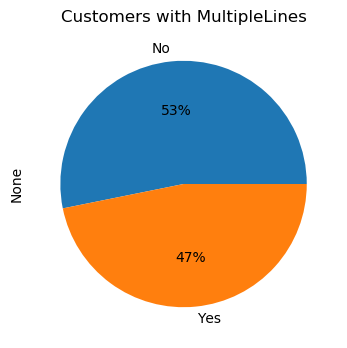

In [7]:
#describe and plotting graph of customers with multiple lines
dataset.groupby("Multiple_Lines").size().plot.pie(autopct='%.0f%%', figsize=(4, 4))
plt.title("Customers with MultipleLines")
plt.show()

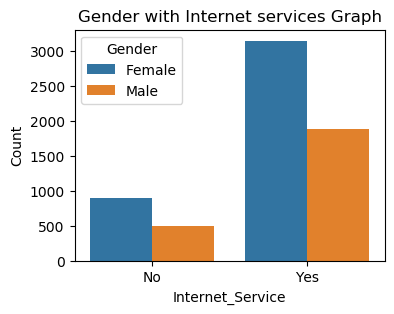

In [9]:
#distribution of genders with InternetService
gender_internet = dataset.groupby(['Internet_Service','Gender']).size().reset_index()
gender_internet = gender_internet.rename(columns={0: 'Count'})
plt.figure(figsize=(4, 3))
sns.barplot(x='Internet_Service',y='Count',hue='Gender',data=gender_internet)
plt.title("Gender with Internet services Graph")
plt.show()

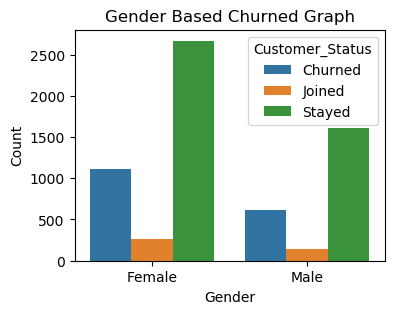

In [10]:
#Gender with and without churned
gender_churn = dataset.groupby(['Gender','Customer_Status']).size().reset_index()
gender_churn = gender_churn.rename(columns={0: 'Count'})
plt.figure(figsize=(4, 3))
sns.barplot(x='Gender',y='Count',hue='Customer_Status',data=gender_churn)
plt.title("Gender Based Churned Graph")
plt.show()

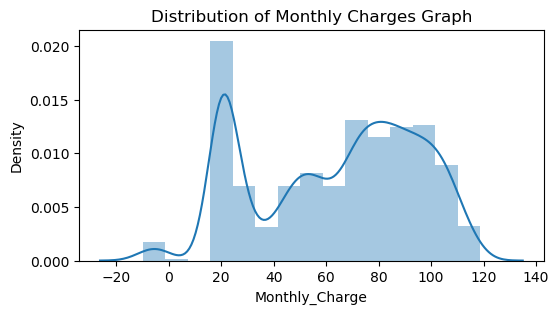

In [11]:
#distribution graph of monthly charges
plt.figure(figsize=(6, 3))
sns.distplot(dataset['Monthly_Charge'], bins = 15) 
plt.title("Distribution of Monthly Charges Graph")
plt.show()

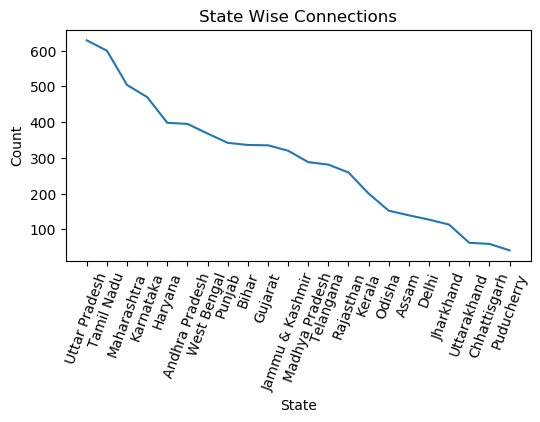

In [14]:
#Statewise connection graph
data = dataset.groupby(["State"]).size().sort_values(ascending=False).reset_index(name='Count')
plt.figure(figsize=(6, 3))
sns.lineplot(data=data, x="State", y="Count")
plt.xticks(rotation=70)
plt.title("State Wise Connections")
plt.show()

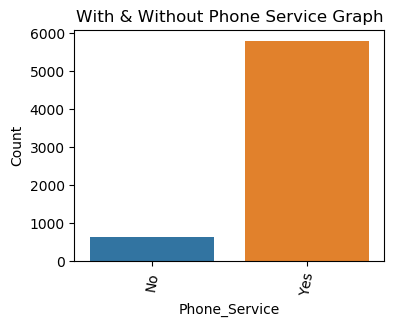

In [16]:
#Connection with and without phone service
crime = dataset.groupby(["Phone_Service"]).size().reset_index(name='Count') 
plt.figure(figsize=(4, 3))
sns.barplot(data=crime, x='Phone_Service', y='Count')
plt.xticks(rotation="80")
plt.title("With & Without Phone Service Graph")
plt.show() 

In [33]:
#Pre-process the data by converting categorical variables to numerical variables, and replacing missing values with mean.
dataset.drop(['Customer_ID'], axis = 1,inplace=True)
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric
        label_encoder.append([columns[i], le])
dataset.fillna(dataset.mean(), inplace = True)
print("Dataset After Categorical Conversion")
dataset

Dataset After Categorical Conversion


,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,1,35,0,4,7,27,5,1,0,1,...,1,65.60,593.30,0.00,0,381.51,974.81,2,5,20
1,0,45,1,12,14,13,5,1,1,1,...,1,-4.00,542.40,38.33,10,96.21,610.28,2,5,20
2,1,51,0,21,4,35,4,1,0,1,...,0,73.90,280.85,0.00,0,134.60,415.45,0,1,2
3,1,79,0,9,3,21,3,1,0,1,...,0,98.00,1237.85,0.00,0,361.66,1599.51,0,2,18
4,0,80,0,17,3,8,5,1,0,1,...,1,83.90,267.40,0.00,0,22.14,289.54,0,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,0,41,0,19,6,33,5,1,1,1,...,1,74.40,896.75,0.00,0,37.96,934.71,0,1,3
6414,1,51,1,6,0,19,0,0,2,1,...,1,45.25,3139.80,0.00,0,0.00,3139.80,2,5,20
6415,0,65,1,10,14,25,5,1,1,1,...,0,74.95,2869.85,0.00,0,599.64,3469.49,0,2,18
6416,1,23,0,13,2,10,5,1,1,1,...,1,70.15,4480.70,0.00,0,2107.52,6588.22,2,5,20


In [34]:
#dataset normalizing using standard Scaler
Y = dataset['Customer_Status'].ravel()
dataset.drop(['Customer_Status'], axis = 1,inplace=True)
X = dataset.values
sc = StandardScaler()
X = sc.fit_transform(X)
print("Normalized Data = "+str(X))

Normalized Data = [[ 1.3069112  -0.72269781 -0.99564675 ... -0.71837381  0.56233661
   0.5430301 ]
 [-0.76516293 -0.12397901  1.00437229 ... -0.8455525   0.56233661
   0.5430301 ]
 [ 1.3069112   0.23525227 -0.99564675 ... -0.91352557 -1.84652463
  -2.12384951]
 ...
 [-0.76516293  1.07345859  1.00437229 ...  0.15198016 -1.24430932
   0.24671014]
 [ 1.3069112  -1.44116037 -0.99564675 ...  1.2400552   0.56233661
   0.5430301 ]
 [ 1.3069112   1.55243363 -0.99564675 ... -0.50639886  0.56233661
   0.5430301 ]]


In [35]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Train & Test Dataset Split")
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset= "+str(X.shape[1]))
print("80% records used to train Neural Network : "+str(X_train.shape[0]))
print("20% records features used to test Neural Network : "+str(X_test.shape[0]))

Train & Test Dataset Split
Total records found in dataset = 6418
Total features found in dataset= 30
80% records used to train Neural Network : 5134
20% records features used to test Neural Network : 1284


In [44]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [45]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    plt.figure(figsize=(6, 3))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.show()    

Random Forest Accuracy  : 99.06542056074767
Random Forest Precision : 97.8350578960335
Random Forest Recall    : 97.2133833484241
Random Forest FSCORE    : 97.52025084922917


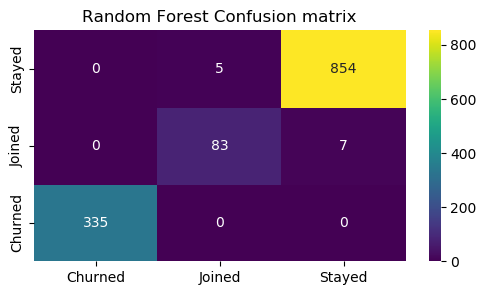

In [46]:
#training Random Forest algorithm on 80% training data
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train)
#performing prediction on 20% test data
predict = rf_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Random Forest", y_test, predict)

Logistic Regression Accuracy  : 98.5202492211838
Logistic Regression Precision : 96.24161658392126
Logistic Regression Recall    : 95.94705299012632
Logistic Regression FSCORE    : 96.09339369496145


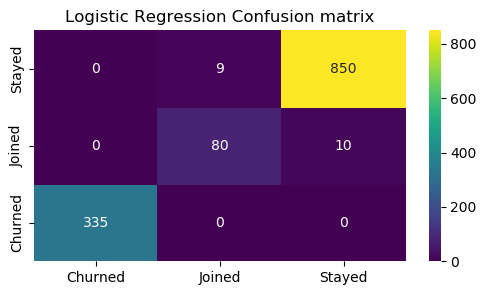

In [47]:
#training LogisticRegression algorithm on 80% training data
lr_cls = LogisticRegression()
lr_cls.fit(X_train, y_train)
#performing prediction on 20% test data
predict = lr_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Logistic Regression", y_test, predict)

Perceptron Neural Network Accuracy  : 97.74143302180686
Perceptron Neural Network Precision : 95.25428904558325
Perceptron Neural Network Recall    : 93.1166506106127
Perceptron Neural Network FSCORE    : 94.13814995965741


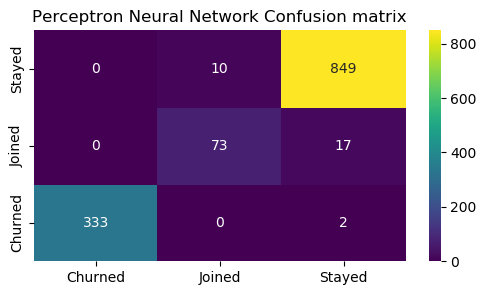

In [48]:
#training LogisticRegression algorithm on 80% training data
mlp_cls = MLPClassifier()
mlp_cls.fit(X_train, y_train)
#performing prediction on 20% test data
predict = mlp_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Perceptron Neural Network", y_test, predict)

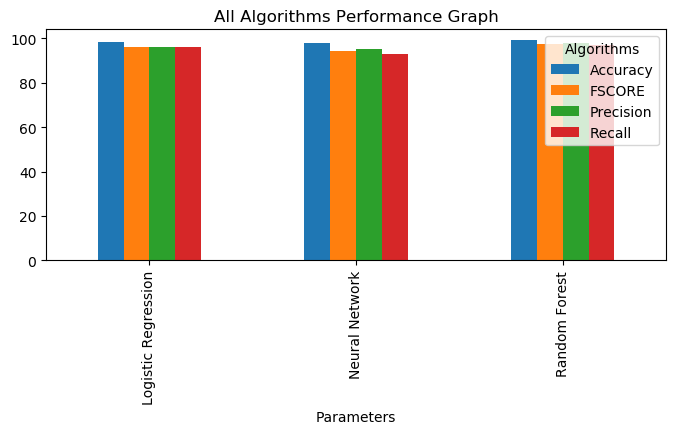

In [49]:
#plot all algorithm performance in tabukar format
df = pd.DataFrame([['Random Forest','Accuracy',accuracy[0]],['Random Forest','Precision',precision[0]],['Random Forest','Recall',recall[0]],['Random Forest','FSCORE',fscore[0]],
                   ['Logistic Regression','Accuracy',accuracy[1]],['Logistic Regression','Precision',precision[1]],['Logistic Regression','Recall',recall[1]],['Logistic Regression','FSCORE',fscore[1]],
                   ['Neural Network','Accuracy',accuracy[2]],['Neural Network','Precision',precision[2]],['Neural Network','Recall',recall[2]],['Neural Network','FSCORE',fscore[2]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(8, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [50]:
#display all algorithm performnace
algorithms = ['Random Forest', 'Logistic Regression', 'Neural Network']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data  

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Random Forest,99.065421,97.835058,97.213383,97.520251
1,Logistic Regression,98.520249,96.241617,95.947053,96.093394
2,Neural Network,97.741433,95.254289,93.116651,94.138150
